In [13]:
import pandas as pd
import matplotlib.pyplot as plt #grafik ve görsellestirme
from sklearn.model_selection import train_test_split #test ve eğitim verilerini bölmek için
from sklearn.neighbors import KNeighborsClassifier #knn modeli sınıfı
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
# Karar ağacını görselleştirme (opsiyonel)
from sklearn.tree import plot_tree

In [3]:
df=pd.read_csv('cleaned_data.csv')  

In [4]:
# 2. Hedef Değişkeni ve Özelliklerin Seçilmesi
X = df.drop(columns=["treatment"])  # Özellikler
y = df["treatment"]  # Hedef değişken


# 4. Eğitim ve Test Setlerine Bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

In [6]:

# Yapay Sinir Ağı modeli
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)

In [7]:
# Modeli eğitin
mlp_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [8]:
# Test seti üzerinde tahmin yapın
y_pred = mlp_model.predict(X_test)
# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
# Performans metriklerini içeren bir veri çerçevesi oluşturma
performans_tablosu = pd.DataFrame({
    'Metrik': ['Doğruluk', 'Hassasiyet', 'Duyarlılık', 'F1 Skoru'],
    'Değer': [accuracy, precision, recall, f1]
})

# Tabloyu yazdırma
print(performans_tablosu)

       Metrik     Değer
0    Doğruluk  0.814570
1  Hassasiyet  0.822917
2  Duyarlılık  0.877778
3    F1 Skoru  0.849462


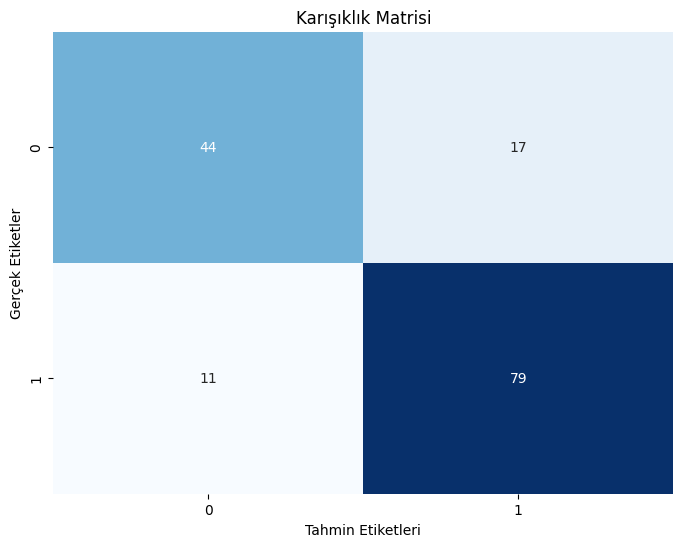

In [9]:
# Karışıklık matrisini görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Karışıklık Matrisi')
plt.xlabel('Tahmin Etiketleri')
plt.ylabel('Gerçek Etiketler')
plt.show()

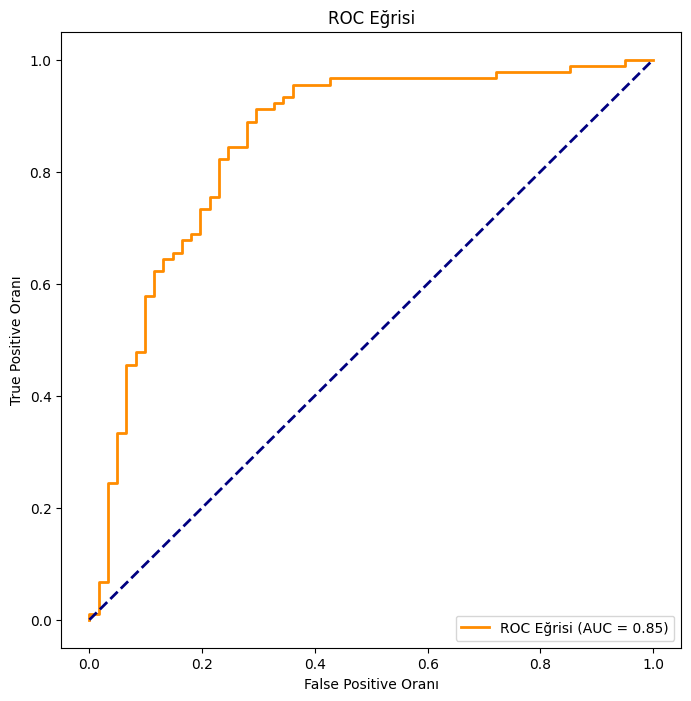

In [14]:
# Yapay Sinir Ağı modelinin tahmin olasılıklarını alın
y_prob = mlp_model.predict_proba(X_test)[:, 1]

# ROC eğrisini hesaplayın
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisini çizin
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Eğrisi (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()